## Infinite Overlapping Mixture Model with Binary clusters

In [164]:
%load_ext autoreload
%autoreload 2
import utils, iomm_infinite

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Synthetic Data

In [166]:
#Generate synthetic data
K=12
N=100
n_train=40
D=8
N_iter=400
alpha_prior = 5
burning_period=100

Z = utils.random_z(N,K)
X = utils.random_x(N,D)
theta= utils.random_theta(N,K,D,alpha_prior)

#### IOMM algorithm

In [167]:
IOMM = iomm_infinite.IOMM(N = N, 
                 K = K, 
                 D = D, 
                 N_iter = N_iter, 
                 Z = Z, 
                 X = X, 
                 theta = theta, 
                 alpha_prior = alpha_prior, 
                 omega = 1,
                 copy_rows = n_train,
                 burning_period=burning_period)

In [168]:
%%capture
Z_hat,theta_resampled,U_hat,Z_hat_list = IOMM.learning(random_walk=False)

In [19]:
from matplotlib import pyplot as plt 
import numpy as np

In [99]:
K_hat=theta_resampled[N_iter-1].shape[0]
theta_evol=np.zeros([N_iter,K_hat*D])
theta_evol_mean=np.zeros([N_iter,K_hat*D])
temp=0
ind_evol=0
for n in range(N_iter):
    ind_evol=0
    for d in range(D):
        for k in range(theta_resampled[n].shape[0]):
            theta_evol[n,ind_evol]=theta_resampled[n][k,d]
            ind_evol=ind_evol+1

for n in range(N_iter):
    for ind in range(K_hat*D):
        theta_evol_mean[n,ind]=np.sum(theta_evol[:n,ind])/(n+1)

### Convergence of thetas

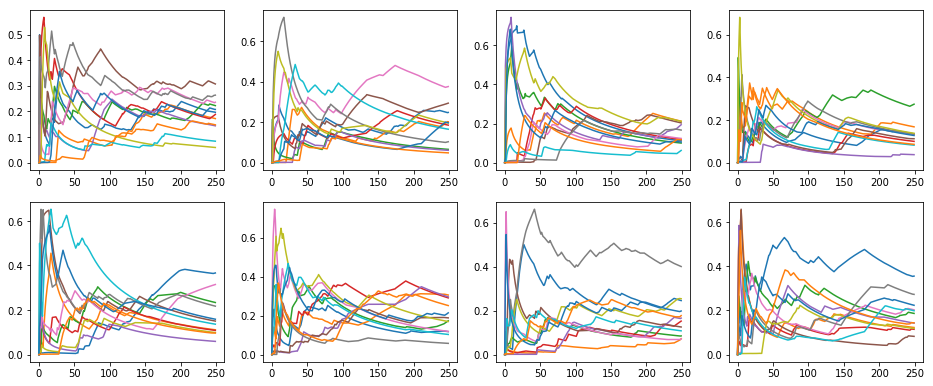

In [100]:
fig=plt.figure(figsize=(16,10))

for d in range(D):
    ax=fig.add_subplot(3,4,d+1)
    for kd in range(K*(d),K*(d+1)):
        ax.plot(range(N_iter),theta_evol_mean[:,kd])
plt.show()

### Results

In [169]:
#we compute the U matrix N*N showing the number of shared clusters between each data point
import numpy as np
print(np.around(U_hat,0))
U=np.dot(Z,Z.T)
print(U)

[[  8.   8.   8. ...,   8.   8.   8.]
 [  8.   9.   9. ...,   8.   8.   8.]
 [  8.   9.  10. ...,   8.   9.   8.]
 ..., 
 [  8.   8.   8. ...,   8.   8.   8.]
 [  8.   8.   9. ...,   8.   9.   8.]
 [  8.   8.   8. ...,   8.   8.   8.]]
[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  1.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  2.  1.  0.]
 [ 0.  0.  0. ...,  1.  2.  0.]
 [ 0.  1.  0. ...,  0.  0.  1.]]


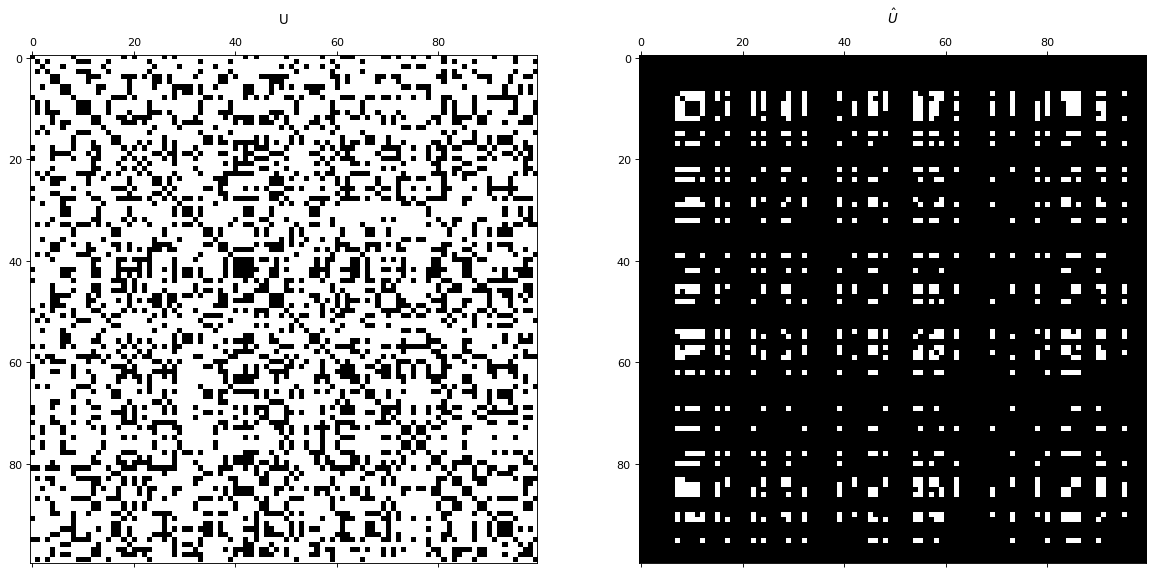

In [170]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.title.set_text('U')
ax2.title.set_text('$\hat{U}$')

ax1.spy(U)
ax2.spy(U_hat)

plt.show()

In [171]:
# summmary statistics
U_diff=abs(U-U_hat)
print("% of pairs having same number of clusters:",len(U_diff[U_diff<1])/(N*N))
print("% of pairs having at most 1 cluster difference:",len(U_diff[U_diff<2])/(N*N))
print("% of pairs having at most 2 clusters difference:",len(U_diff[U_diff<3])/(N*N))
print("% of pairs having at most 3 clusters difference:",len(U_diff[U_diff<4])/(N*N))

% of pairs having same number of clusters: 0.4083
% of pairs having at most 1 cluster difference: 0.5665
% of pairs having at most 2 clusters difference: 0.5816
% of pairs having at most 3 clusters difference: 0.5902


In [162]:
Z_hat_sum=np.zeros([N_iter-burning_period-1,N])

for z in range(N_iter-burning_period-1):
    for i in range(N):
        Z_hat_sum[z,i]=np.sum(Z_hat_list[z][i,:])

        mat_clusters_count=np.zeros([N,1+int(np.max(Z_hat_sum))])
for i in range(N):
    for c in range(1+int(np.max(Z_hat_sum))):
        mat_clusters_count[i,c]=(Z_hat_sum[:,i]==c).sum()

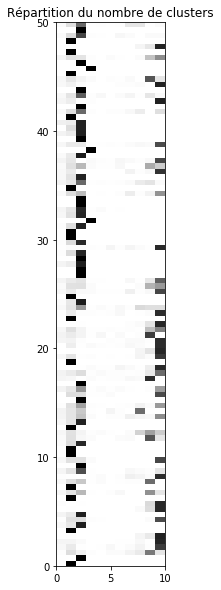

In [163]:
import scipy as sp
plt.figure(figsize=(18,10))

bins=np.arange(int(np.max(Z_hat_sum)))

Mat=sp.sparse.bsr_matrix(mat_clusters_count)
d=Mat.todense()
plt.imshow(d,interpolation='none',cmap='binary',extent=[0,int(np.max(Z_hat_sum)),0,N/2])
plt.title("Répartition du nombre de clusters")
#plt.colorbar()
plt.show()